In [1]:
import cv2 as cv
import os
from matplotlib import pyplot as plt
import numpy as np

dataDir = '../dataset/images' # Change this, according to your images' directory path

In [2]:
img = cv.imread(os.path.join(dataDir, 'road57.png')) # Change this, according to your image's path

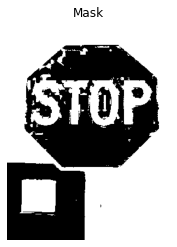

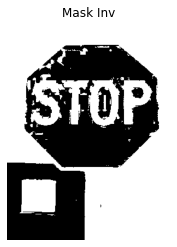

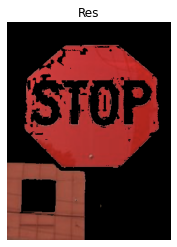

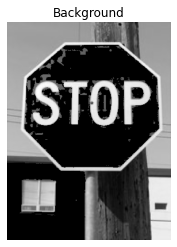

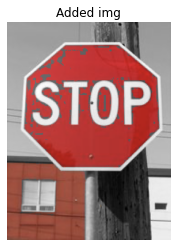

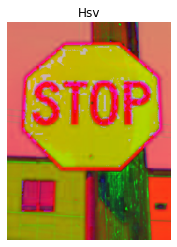

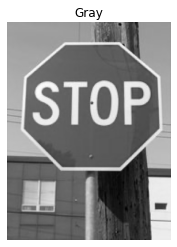

In [8]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#set the bounds for the red hue
lower_red = np.array([0,100,100])
upper_red = np.array([20,255,255])

#create a mask using the bounds set
mask = cv.inRange(hsv, lower_red, upper_red)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)

mask = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
mask_inv = cv.cvtColor(mask_inv, cv.COLOR_BGR2RGB) # convert from BGR to RGB because we are using matplotlib to display the image
res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
added_img = cv.cvtColor(added_img, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(hsv, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)

plt.imshow(mask_inv)
plt.title('Mask')
plt.axis('off')
plt.show()
plt.imshow(mask_inv)
plt.title('Mask Inv')
plt.axis('off')
plt.show()
plt.imshow(res)
plt.title('Res')
plt.axis('off')
plt.show()
plt.imshow(background)
plt.title('Background')
plt.axis('off')
plt.show()
plt.imshow(added_img)
plt.title('Added img')
plt.axis('off')
plt.show()
plt.imshow(hsv)
plt.title('Hsv')
plt.axis('off')
plt.show()
plt.imshow(gray)
plt.title('Gray')
plt.axis('off')
plt.show()